<a href="https://colab.research.google.com/github/Joaogmr472/RELAMPAGOS_SUDESTE/blob/main/C%C3%B3digo_1_PLOTA_FIGURAS_ANUAL_MENSAL_SAZONAL_ENTLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REDE EART NETWORK TOTAL LIGHTNING NETWORKS**

**PLOTA FIGURAS DE RELÂMPAGOS REDE ENTLN 2015-2020 PARA O SUDESTE DO BRASIL**
**SCRIPT I**
---
**OBJETIVO:** Este Google Colab plota mapas **anual**, **mensal** e **sazonal** para o Sudeste de descargas de retorno da rede ENTLN.

**DADOS DE ENTRADA**: Dados de Descargas de Retorno da rede em superfície ENTLN. 
Dados de acumulados diários de descargas de retorno.
---
**DADOS DE SAÍDA:**
1.   Mapa **anual** de relâmpagos. 
2.   Mapa **mensal** de relâmpagos. 
3.   Mapa **sazonal** de relâmpagos. 
---
**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Importação das bibliotecas
3.   Monta o drive da pessoa
4.   Acessa os dados através do Drive
5.   Processa os dados
6.   Gera as Figuras

*   PLOTA FIGURA DE ACUMULADO ANUAL MÉDIO DE RELÂMPAGOS (2015-2020) POR TIPO (IN, NS+, NS-)
*   PLOTA FIGURA DE ACUMULADO SAZONAL MÉDIO (2015-2020) POR TIPO
*   PLOTA FIGURA DE ACUMULADO MENSAL MÉDIO (2015-2020)
---
**OBSERVAÇÕES IMPORTANTES**: 
1. Mudar o caminho para seu drive. Veja em: **###MUDANÇAS AQUI####**
---
***Realizado por: [João G M Ribeiro](https://github.com/Joaogmr472/) e [Enrique V Mattos](https://github.com/evmpython) - 07/mar/2022*** 
NESSE SCRIPT:




# **########## MUDANÇAS AQUI ##########**

CAMINHO DOS DADOS DIÁRIOS

In [21]:
path = f'/content/drive/MyDrive/JOAO_GABRIEL_MESTRADO/MESTRADO/DADOS/'
path_dados = f'{path}ACUMULADOS_DIARIOS/'

CAMINHO DAS PALETAS DE CORES E SHAPEFILES

In [22]:
path_cmap = f'{path}CPT_colors/'
path_shp_reg = f'{path}SHAPEFILES/regioes_2010/'
path_shp_estados = f'{path}SHAPEFILES/br_unidades_da_federacao/'

PASTA DE SAÍDA DAS FIGURAS

In [23]:
output = f'/content/drive/MyDrive/PYTHON/GITHUB/FIGURAS_RELAMPAGOS/'

#**INSTALAÇÃO DAS BIBLIOTECAS**

In [24]:
# Instalando o cartopy (usado para gerar Mapas)
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy

# Instalando o proplot (usado para gerar Mapas também)
!pip install proplot==0.6.4

# Intalando pacote para mascarar shapefile
!pip install salem
!pip install geopandas
!pip install pyproj
!pip install rasterio


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Using cached Shapely-1.8.1.post1.tar.gz (198 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for 

# **Download de informações auxiliares**


In [25]:
# Baixa paleta de cores
!wget -c https://www.dropbox.com/s/t7b8x2i3gnsq8gv/cpt_convert.py 

# Baixando os arquivos de shapefile dos estados do Sudeste
!wget -q -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/MG/mg_unidades_da_federacao.zip
!wget -q -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/ES/es_unidades_da_federacao.zip
!wget -q -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/RJ/rj_unidades_da_federacao.zip
!wget -q -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/SP/sp_unidades_da_federacao.zip

!unzip -o /content/mg_unidades_da_federacao.zip
!unzip -o /content/es_unidades_da_federacao.zip
!unzip -o /content/rj_unidades_da_federacao.zip
!unzip -o /content/sp_unidades_da_federacao.zip

--2022-03-08 15:15:15--  https://www.dropbox.com/s/t7b8x2i3gnsq8gv/cpt_convert.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.84.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.84.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t7b8x2i3gnsq8gv/cpt_convert.py [following]
--2022-03-08 15:15:16--  https://www.dropbox.com/s/raw/t7b8x2i3gnsq8gv/cpt_convert.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc66c5b0751ad6c57dee29245f3.dl.dropboxusercontent.com/cd/0/inline/BhFRlckPM04pCQRRLjL0H2DsewXCbSI_Z0hjDIu1kvz0SP6yp7j-TtJeosIEJ41LWB3quQmis9sHMhBRJsBrwe_ZNk2prenw75660iNUKeTKII7pY8SYffKqjnonSZwMKzkkqBuoZ5ulgtWbPBlHem4CX4B5dDhh5ag8LenU6C2lxA/file# [following]
--2022-03-08 15:15:16--  https://ucc66c5b0751ad6c57dee29245f3.dl.dropboxusercontent.com/cd/0/inline/BhFRlckPM04pCQRRLjL0H2DsewXCbSI_Z0hjDIu1kvz0SP6yp7j-TtJeosI

#**IMPORTA AS BIBLIOTECAS**

In [26]:
##############################################
import matplotlib
matplotlib.rcParams.update({'font.size':22})
from matplotlib import pyplot as plt
from cpt_convert import loadCPT # Importando a função CPT convert 
from matplotlib.colors import LinearSegmentedColormap # interpolação linear para as cores dos mapas
##############################################
import proplot as plot
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
##############################################
import numpy as np
import glob
##############################################
import salem
import xarray as xr
import pandas as pd
##############################################
import warnings
warnings.filterwarnings('ignore')
##############################################
# acessando o drive
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
##############################################

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importa funções**

In [27]:
#----------------------------------------------------------------------------------- 
# Função que plota por Estado 
#----------------------------------------------------------------------------------- 
def evm_plot_by_state():
    shapefile = list(shpreader.Reader('/content/ES_UF_2019.shp').geometries()) ; ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.7)   
    shapefile = list(shpreader.Reader('/content/MG_UF_2019.shp').geometries()) ; ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.7)   
    shapefile = list(shpreader.Reader('/content/RJ_UF_2019.shp').geometries()) ; ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.7)   
    shapefile = list(shpreader.Reader('/content/SP_UF_2019.shp').geometries()) ; ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.7)   
    

#**LÊ O SHAPEFILE**


In [28]:
# Abrindo o arquivo shapefile
shp = salem.read_shapefile(f'{path_shp_reg}regioes_2010.shp')
shp_sudeste = shp.loc[shp['nome'] == 'Sudeste']  # remover as outras regiões

#**CARREGA A FUNÇÃO DE COLORMAP**

In [29]:
# Converte o arquivo cpt a ser usado no python
cpt_raios = loadCPT(f'{path_cmap}raios.cpt')

#Fazendo uma interpolação linear com o arquivo cpt
cpt_convert_raios = LinearSegmentedColormap('cpt_raios', cpt_raios)

# Converte o arquivo cpt a ser usado no python
cpt_corr = loadCPT(f'{path_cmap}PICO_CORR.cpt')

#Fazendo uma interpolação linear com o arquivo cpt
cpt_convert_corr = LinearSegmentedColormap('cpt_corr', cpt_corr)

#**SELECIONA OS LIMITES DA REGIÃO SUDESTE DO BRASIL**

In [30]:
latN = -14.0
latS = -26.0
lonW = -53.50
lonE = -39.50

#**Abre os Arquivos NETCDF**
1.   ic: INTRANUVEM (IN)

2.   cg_pos: NUVEM-SOLO POSITIVO (NS+)

3.   cg_neg: NUVEM-SOLO NEGATIVO (NS-)

In [31]:
ic = xr.open_mfdataset(f'{path_dados}IC/*.nc', concat_dim='time', combine='nested')
cg_pos = xr.open_mfdataset(f'{path_dados}+CG/*.nc', concat_dim='time', combine='nested')
cg_neg = xr.open_mfdataset(f'{path_dados}-CG/*.nc', concat_dim='time', combine='nested')

#**Processa os dados de relâmpagos**


**FAZ O ACUMULADO ANUAL, SAZONAL E MENSAL DE RELÂMPAGOS POR TIPO**

## **RELÂMPAGOS INTRANUVEM (IN)**

acumulado anual médio de relâmpagos

In [32]:
raios_ic_ano = ic['flash'].resample(time='1Y').sum(dim='time').mean(dim='time')
raios_ic_ano = raios_ic_ano.salem.roi(shape=shp_sudeste)

acumulado sazonal médio de relâmpagos

In [33]:
raios_ic_season = ic.flash.resample(time='1M').sum().groupby("time.season").mean(dim="time")
raios_ic_season  = raios_ic_season.salem.roi(shape=shp_sudeste)

acumulado mensal médio

In [34]:
raios_ic_mon = ic.flash.resample(time='1M').sum().groupby("time.month").mean(dim="time")
raios_ic_season  = raios_ic_season.salem.roi(shape=shp_sudeste)

## **RELÂMPAGOS NUVEM-SOLO POSITIVO (NS+)**

acumulado anual médio de relâmpagos

In [35]:
raios_cg_pos_ano = cg_pos['flash'].resample(time='1Y').sum(dim='time').mean(dim='time')
raios_cg_pos_ano = raios_cg_pos_ano.salem.roi(shape=shp_sudeste)

acumulado sazonal médio de relâmpagos

In [36]:
raios_cg_pos_season = cg_pos.flash.resample(time='1M').sum().groupby("time.season").mean(dim="time")
raios_cg_pos_season  = raios_cg_pos_season.salem.roi(shape=shp_sudeste)

acumulado mensal médio

In [37]:
raios_cg_pos_mon = cg_pos.flash.resample(time='1M').sum().groupby("time.month").mean(dim="time")
raios_cg_pos_season  = raios_cg_pos_season.salem.roi(shape=shp_sudeste)

## **RELÂMPAGOS NUVEM-SOLO NEGATIVO (NS-)**

acumulado anual médio de relâmpagos

In [38]:
raios_cg_neg_ano = cg_neg['flash'].resample(time='1Y').sum(dim='time').mean(dim='time')
raios_cg_neg_ano = raios_cg_neg_ano.salem.roi(shape=shp_sudeste)

acumulado sazonal médio de relâmpagos

In [39]:
raios_cg_neg_season = cg_neg.flash.resample(time='1M').sum().groupby("time.season").mean(dim="time")
raios_cg_neg_season  = raios_cg_neg_season.salem.roi(shape=shp_sudeste)

acumulado mensal médio

In [40]:
raios_cg_neg_mon = cg_neg.flash.resample(time='1M').sum().groupby("time.month").mean(dim="time")
raios_cg_neg_season  = raios_cg_neg_season.salem.roi(shape=shp_sudeste)

#**PLOTA AS FIGURAS**

## **ACUMULADO ANUAL MÉDIO DE RELÂMPAGOS**
PARA OS TRÊS TIPOS

In [43]:
# limites das paletas para os plots

bounds_ic = [0,10,20,30,40,50,60,70,80,90]
bounds_cgn = [0,2,4,6,8,10,12,14,16,18]
bounds_cgp = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

norm1 = matplotlib.colors.BoundaryNorm(bounds_ic, cpt_convert_raios.N)
norm2 = matplotlib.colors.BoundaryNorm(bounds_cgn, cpt_convert_raios.N)
norm3 = matplotlib.colors.BoundaryNorm(bounds_cgp, cpt_convert_raios.N)

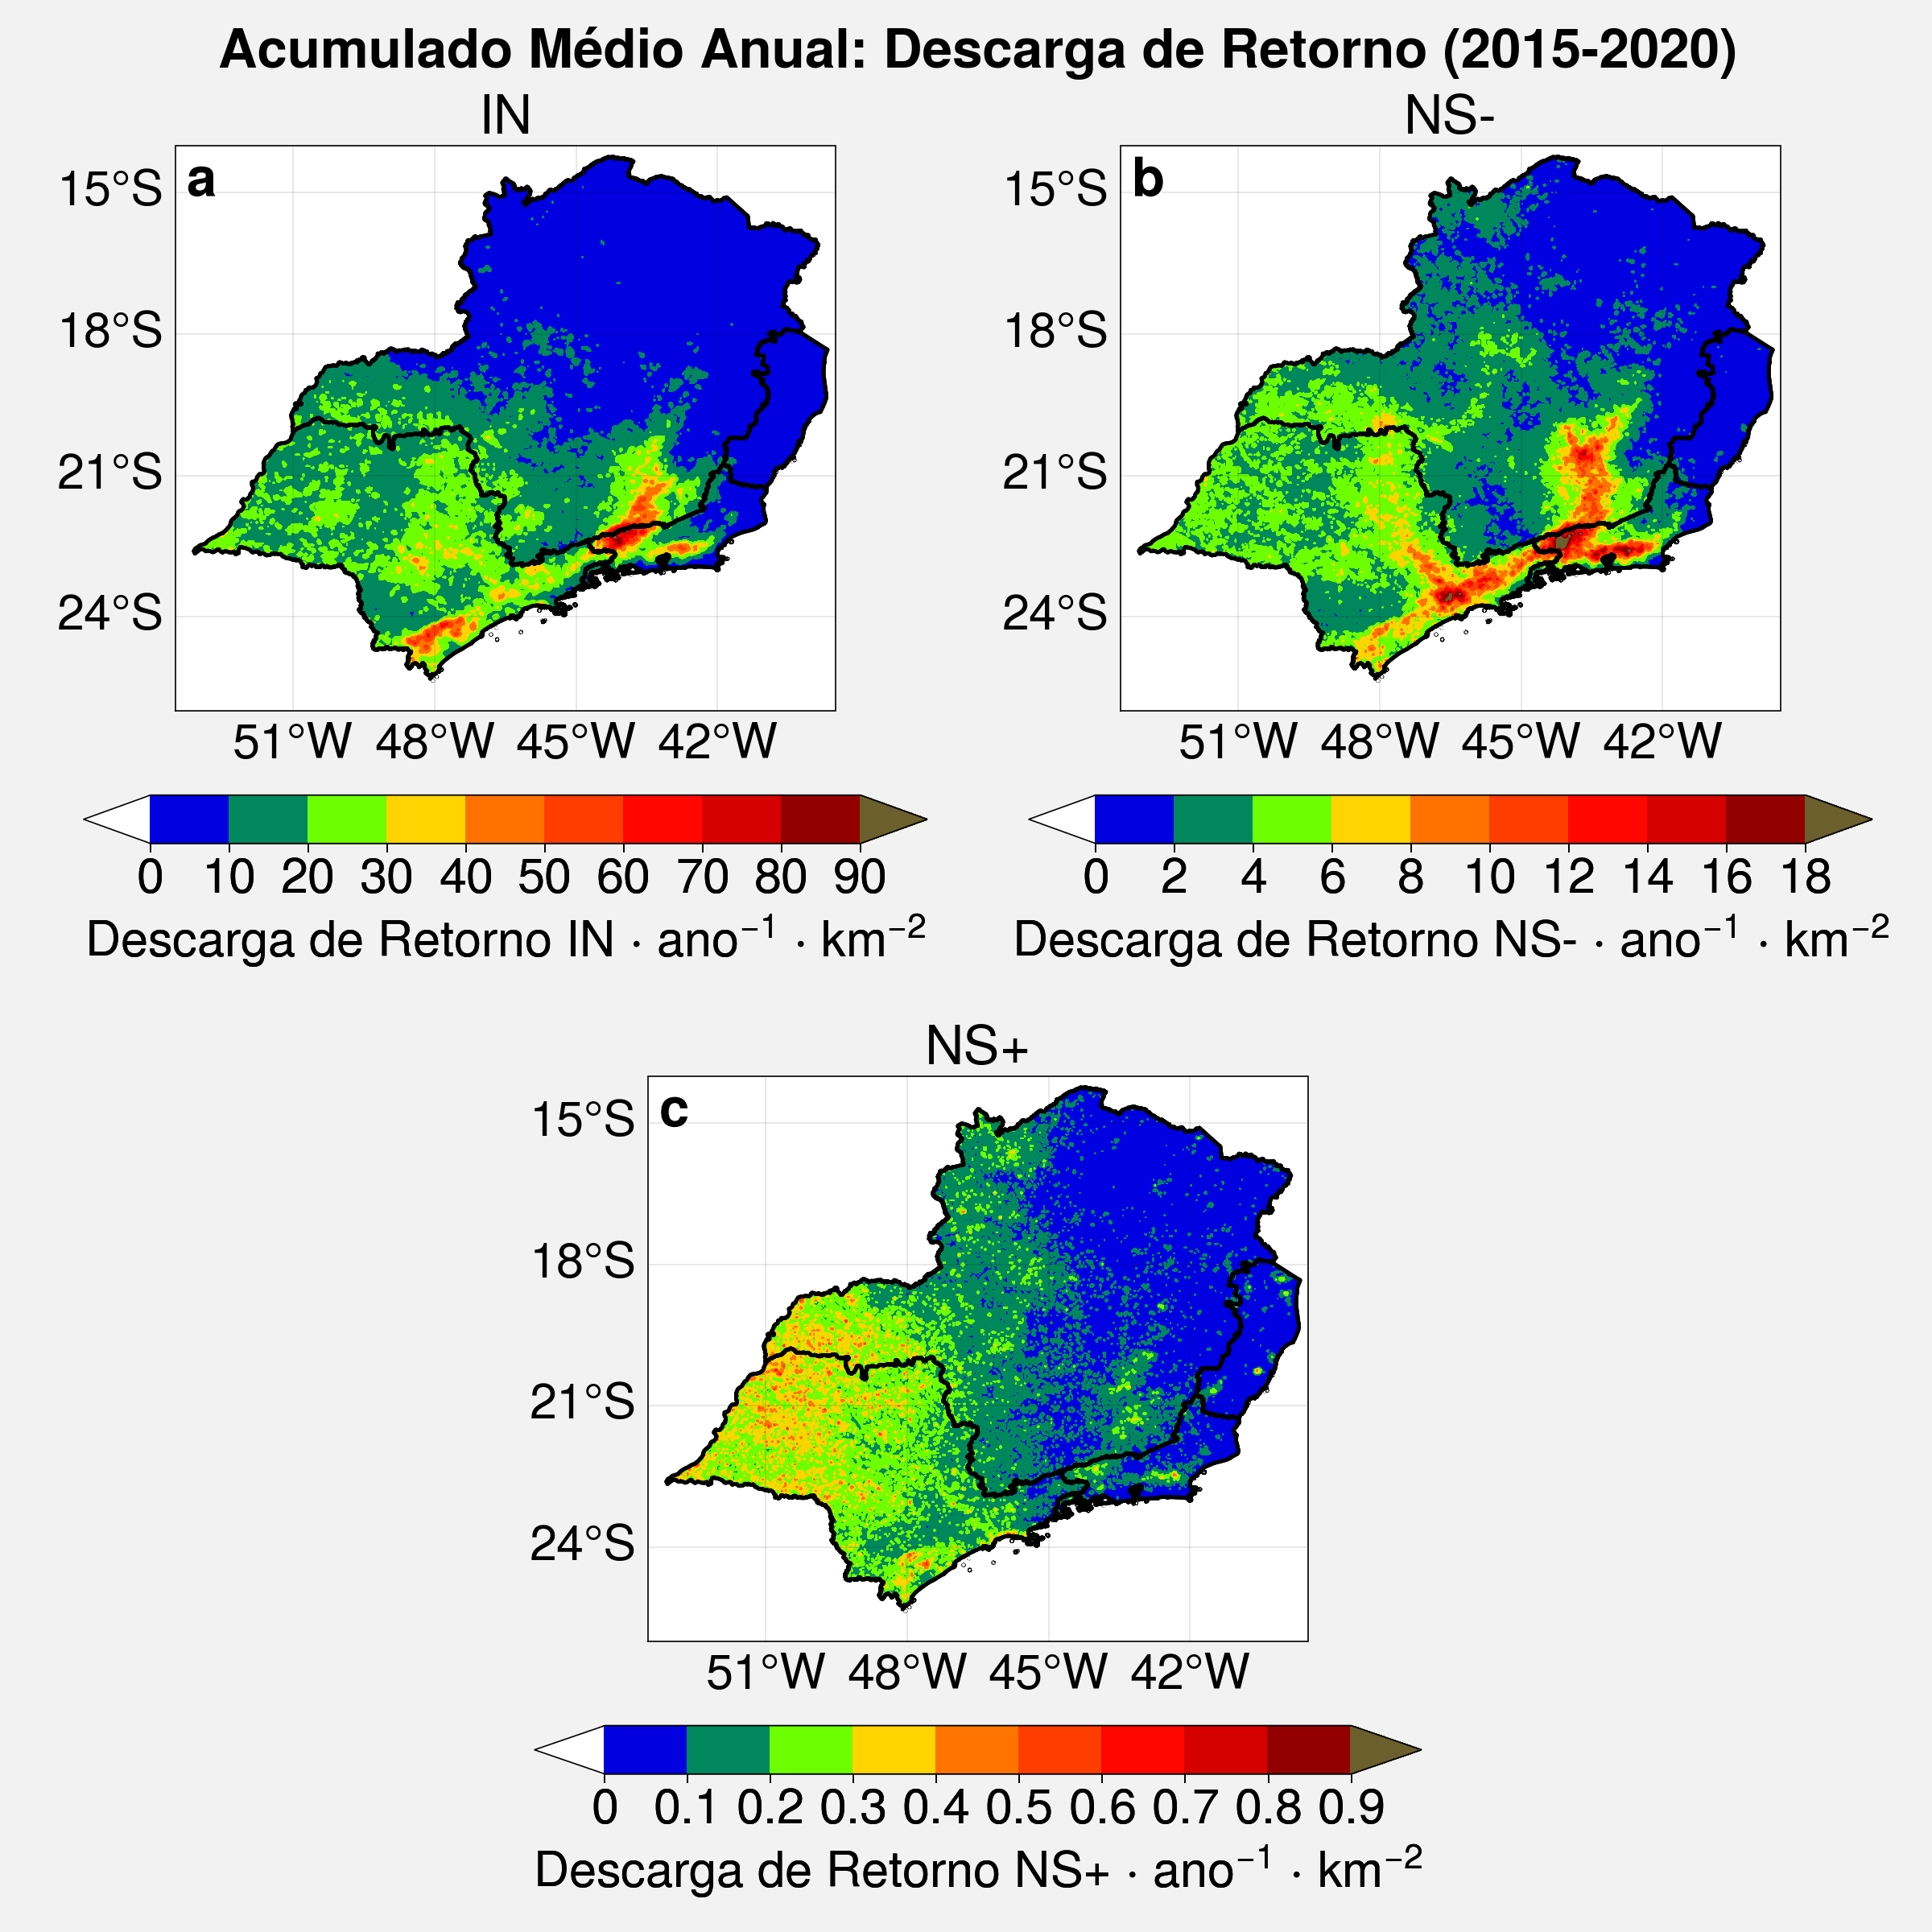

In [44]:
# Plotando a figura

# formato da moldura das imagens
array = [[1, 1, 2, 2],[0, 3, 3, 0]]
matplotlib.rcParams.update({'font.size':22})  # seta o tamanho da fonte

# chama a figura
fig, ax = plot.subplots(array, figsize=(12,12), tight=True, proj='pcarree')

# formatos e configurações da figura
ax.format(coast=False, borders=True, innerborders=False, labels=True, latlines=3, lonlines=3,
          latlim=(latN, latS), lonlim=(lonW, lonE), suptitle=f'Acumulado Médio Anual: Descarga de Retorno (2015-2020)')


#---------------------------------- RELÂMPAGOS IN ------------------------------------------------------------
ax[0].format(title='IN',abc = 1, abcloc='ul')  # título da fig in

# plota a variável
map1 = ax[0].contourf(raios_ic_ano.lon, raios_ic_ano.lat, raios_ic_ano[:,:], cmap=cpt_convert_raios, vmax=90, vmin=0,extend='both')

# plota contornos dos Estados
evm_plot_by_state()

# plota a barra de cores
cbar1 = ax[0].colorbar(map1,matplotlib.cm.ScalarMappable(norm=norm1, cmap=cpt_convert_raios),
                       loc='b', label='Descarga de Retorno IN ${\cdot}$ $ano^{-1}$ ${\cdot}$ $km^{-2}$',
                       width=0.3)
cbar1.set_ticks(bounds_ic)


#---------------------------------- RELÂMPAGOS NS- ------------------------------------------------------------
ax[1].format(title='NS-',abc = 1, abcloc='ul')  # título da fig ns-

# plota a variável
map2 = ax[1].contourf(raios_cg_neg_ano.lon, raios_cg_neg_ano.lat, raios_cg_neg_ano[:,:], cmap=cpt_convert_raios,vmax=18, vmin=0, extend='both')

# plota contornos dos Estados
evm_plot_by_state()

# plota a barra de cores
cbar2 = ax[1].colorbar(map2, matplotlib.cm.ScalarMappable(norm=norm1, cmap=cpt_convert_raios),
                       loc='b', label='Descarga de Retorno NS- ${\cdot}$ $ano^{-1}$ ${\cdot}$ $km^{-2}$',
                       width=0.3)
cbar2.set_ticks(bounds_cgn)

#---------------------------------- RELÂMPAGOS NS+ ------------------------------------------------------------
ax[2].format(title='NS+',abc = 1, abcloc='ul') # título da fig ns+

# plota a variável
map3 = ax[2].contourf(raios_cg_pos_ano.lon, raios_cg_pos_ano.lat, raios_cg_pos_ano[:,:],vmax=0.90, vmin=0, cmap=cpt_convert_raios, extend='both')

# plota contornos dos Estados
evm_plot_by_state()

# plota a barra de cores
cbar3 = ax[2].colorbar(map3, matplotlib.cm.ScalarMappable(norm=norm1, cmap=cpt_convert_raios),
                       loc='b', label='Descarga de Retorno NS+ ${\cdot}$ $ano^{-1}$ ${\cdot}$ $km^{-2}$',
                       width=0.3)
cbar3.set_ticks(bounds_cgp)

# exibe a figura na tela
plot.show() 

# salva a figura
fig.savefig(f'{output}strokes_clima_anual_2015-2020.png', dpi=300)

## **ACUMULADO SAZONAL MÉDIO DE RELÂMPAGOS**

**RELÂMPAGOS IN**

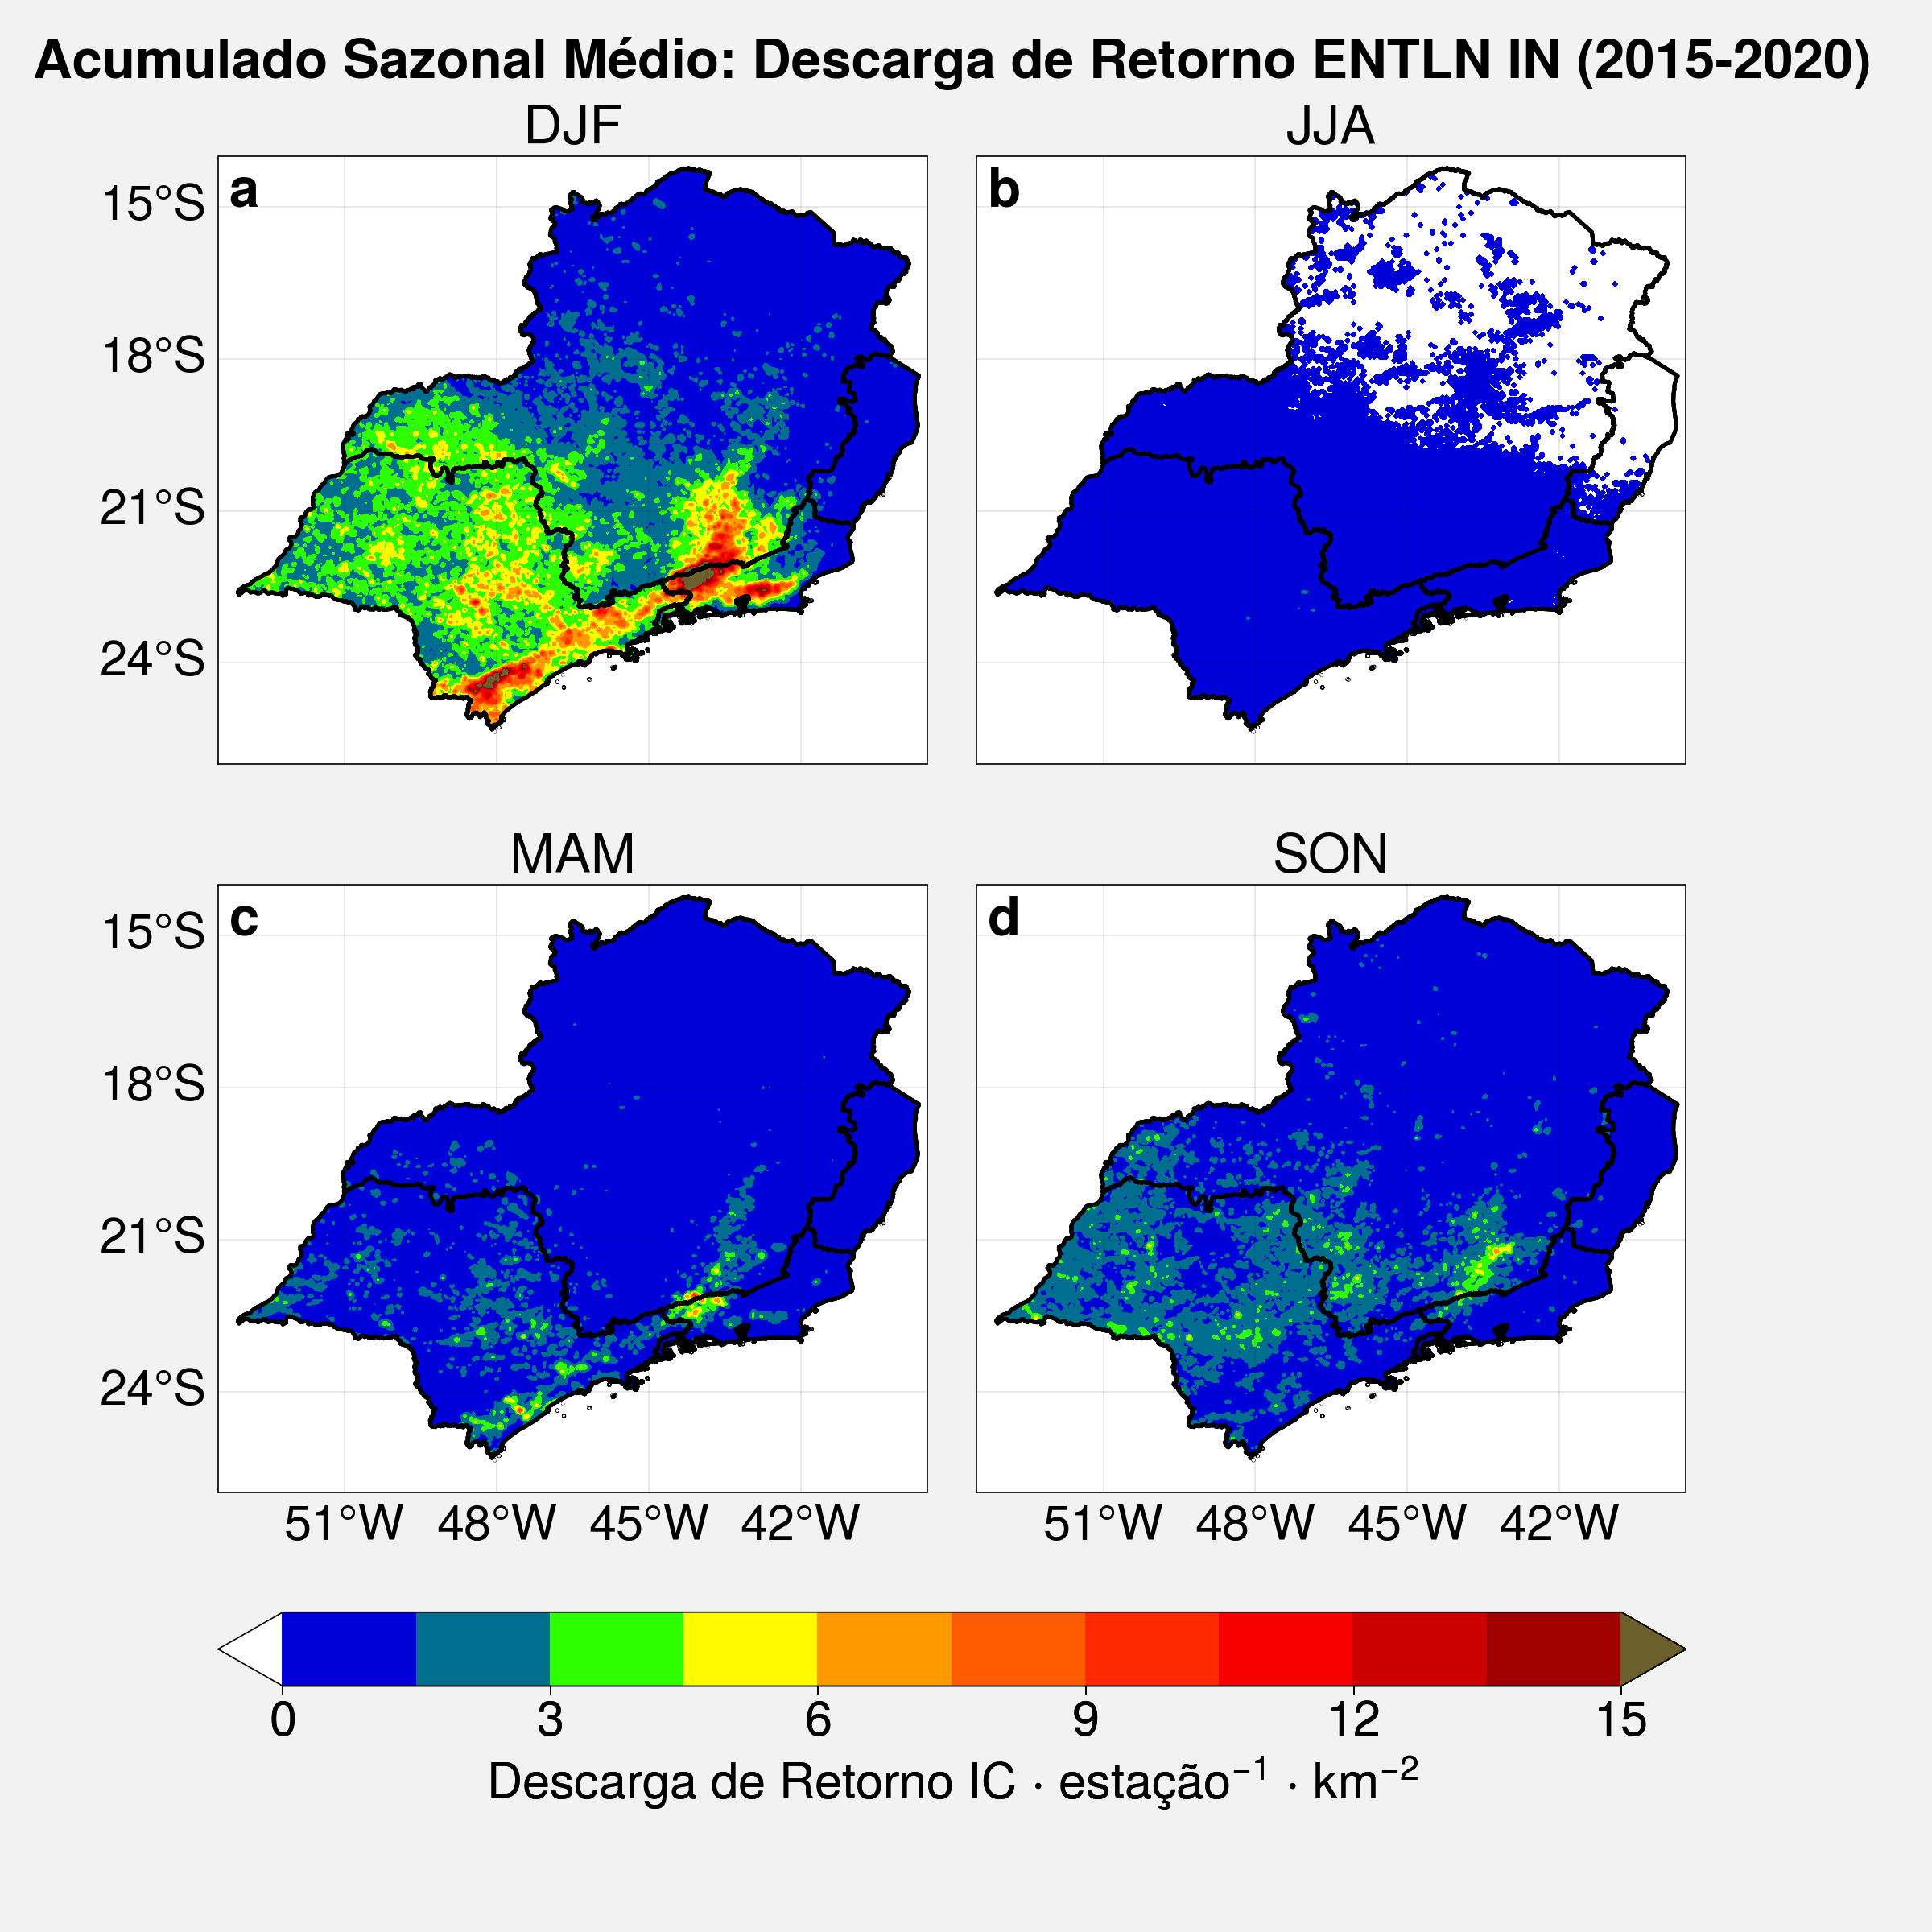

In [48]:
# Plotando a figura

matplotlib.rcParams.update({'font.size':22})  # seta o tamanho da fonte

# chama a figura
fig, ax = plot.subplots(figsize=(12,12), nrows=2, ncols=2, bottom='5em', right='5em',
                        sharex = False, sharey = False, proj='pcarree')
  
# configurações do plot
ax.format(coast=False, borders=True, innerborders=False, latlines=3, lonlines=3,
          latlim=(latN, latS), lonlim=(lonW, lonE), suptitle=f'Acumulado Sazonal Médio: Descarga de Retorno ENTLN IN (2015-2020)')

## looping nas estações do nao
for s in range(len(raios_ic_season)):

    # plota a variável em cada estação do ano  
    map1 = ax[s].contourf(raios_ic_season.lon, raios_ic_season.lat, raios_ic_season[s,:,:],
                          cmap=cpt_convert_raios, vmax=15, vmin=0, extend='both')
    
    # titulo da figura   
    ax[s].format(title=raios_ic_season.season[s].values,abc = 1, abcloc='ul')
    
    # molda as lebels de lat e lon
    if(s == 0):ax[s].format(labels = [True, False, False, False])
    if(s == 1):ax[s].format(labels = [False, False, False, False])
    if(s == 2):ax[s].format(labels = [True, False, True, False])
    if(s == 3):ax[s].format(labels = [False, False, True, False])

    # plota contornos dos Estados
    evm_plot_by_state()

# plota a barra de cores
fig.colorbar(map1, loc='b', label='Descarga de Retorno IC ${\cdot}$ $estação^{-1}$ ${\cdot}$ $km^{-2}$')

# mostra a figura na tela
plot.show()

# salva a figura
fig.savefig(f'{output}ic_strokes_media_sazonal_2015-2020.png', dpi=300)


**RELÂMPAGOS NS+**

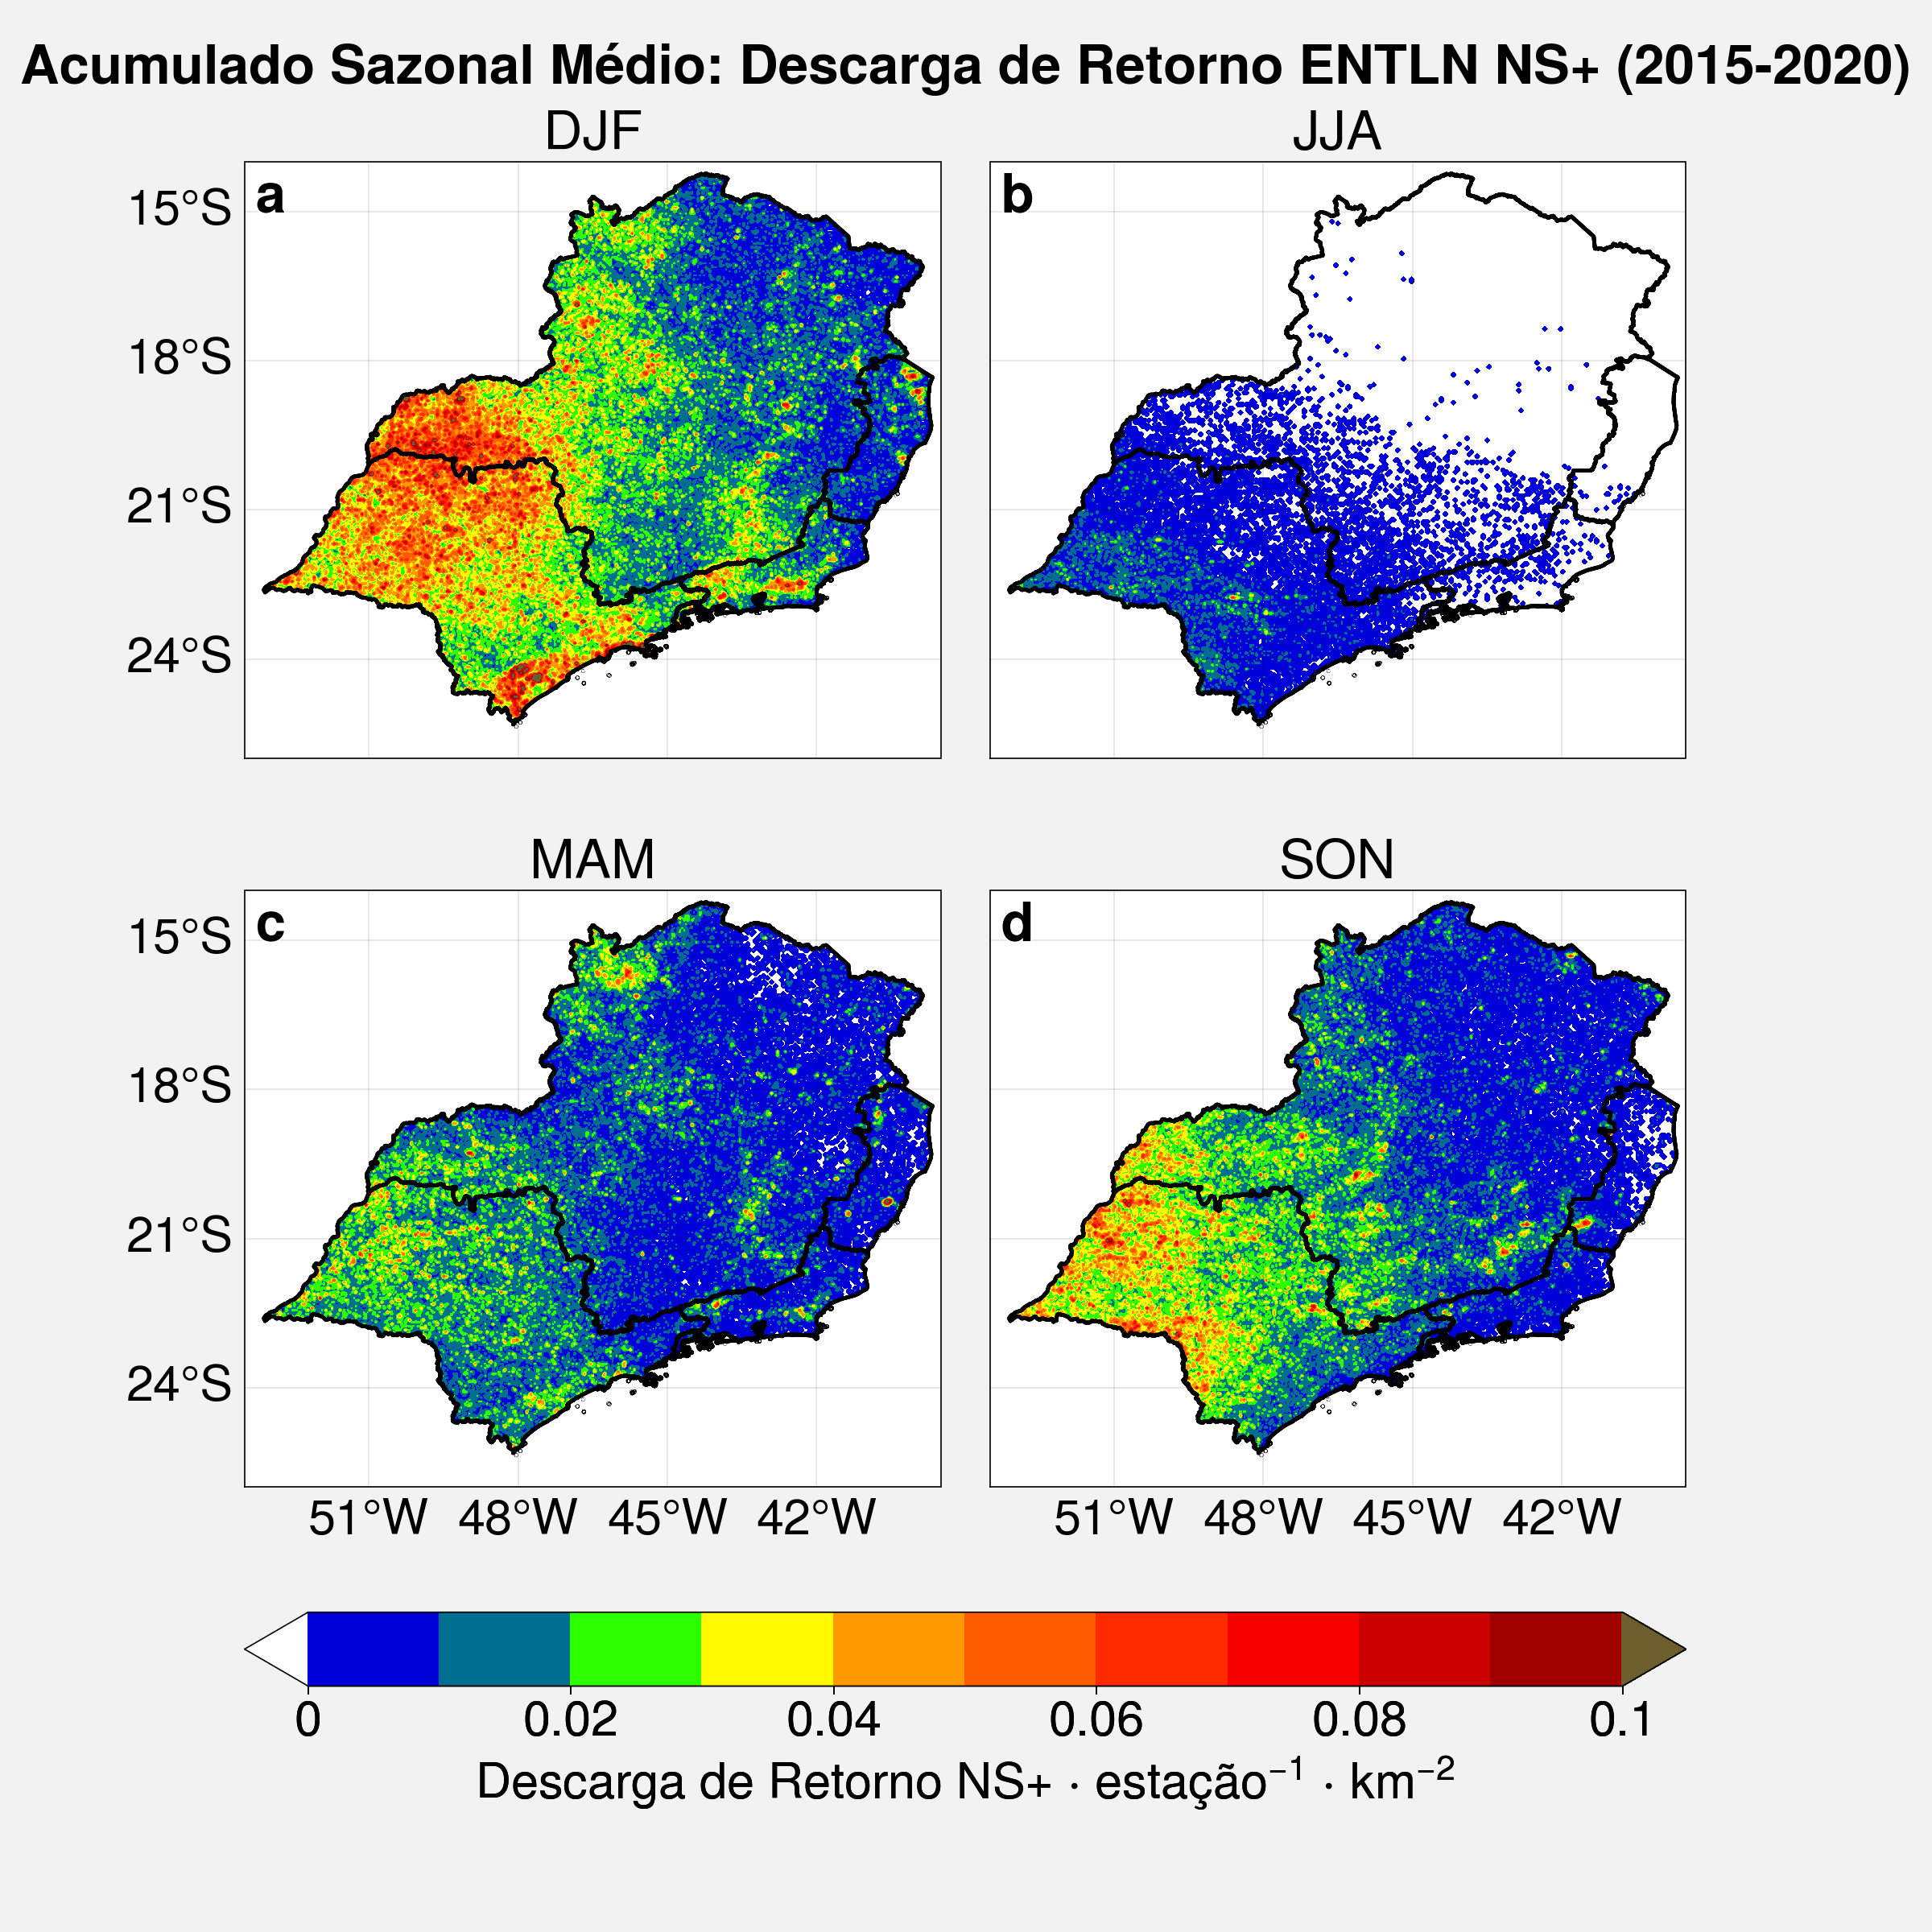

In [49]:
# Plotando a figura

matplotlib.rcParams.update({'font.size':22})  # seta o tamanho da fonte

# chama a figura
fig, ax = plot.subplots(figsize=(12,12), nrows=2, ncols=2, bottom='5em', right='5em',
                        sharex = False, sharey = False, proj='pcarree')
  
# configuração do plot
ax.format(coast=False, borders=True, innerborders=False, latlines=3, lonlines=3,
          latlim=(latN, latS), lonlim=(lonW, lonE), suptitle=f'Acumulado Sazonal Médio: Descarga de Retorno ENTLN NS+ (2015-2020)')

## looping nas estações do nao
for s in range(len(raios_cg_pos_season)):

    # plota a variável em cada estação do ano
    map1 = ax[s].contourf(raios_cg_pos_season.lon, raios_cg_pos_season.lat, raios_cg_pos_season[s,:,:],
                          cmap=cpt_convert_raios, vmax = 0.1,vmin = 0, extend='both')
    
    # titulo da figura
    ax[s].format(title=raios_cg_pos_season.season[s].values,abc = 1, abcloc='ul')
    
    # molda as lebels de lat e lon
    if(s == 0):ax[s].format(labels = [True, False, False, False])
    if(s == 1):ax[s].format(labels = [False, False, False, False])
    if(s == 2):ax[s].format(labels = [True, False, True, False])
    if(s == 3):ax[s].format(labels = [False, False, True, False])

    # plota contornos dos Estados
    evm_plot_by_state()

# plota a barra de cores
fig.colorbar(map1, loc='b',label='Descarga de Retorno NS+ ${\cdot}$ $estação^{-1}$ ${\cdot}$ $km^{-2}$')

# mostra  figura na tela
plot.show()

# salva a figura
fig.savefig(f'{output}ns_pos_strokes_media_sazonal_2015-2020.png', dpi=300)


**RELÂMPAGOS NS-**

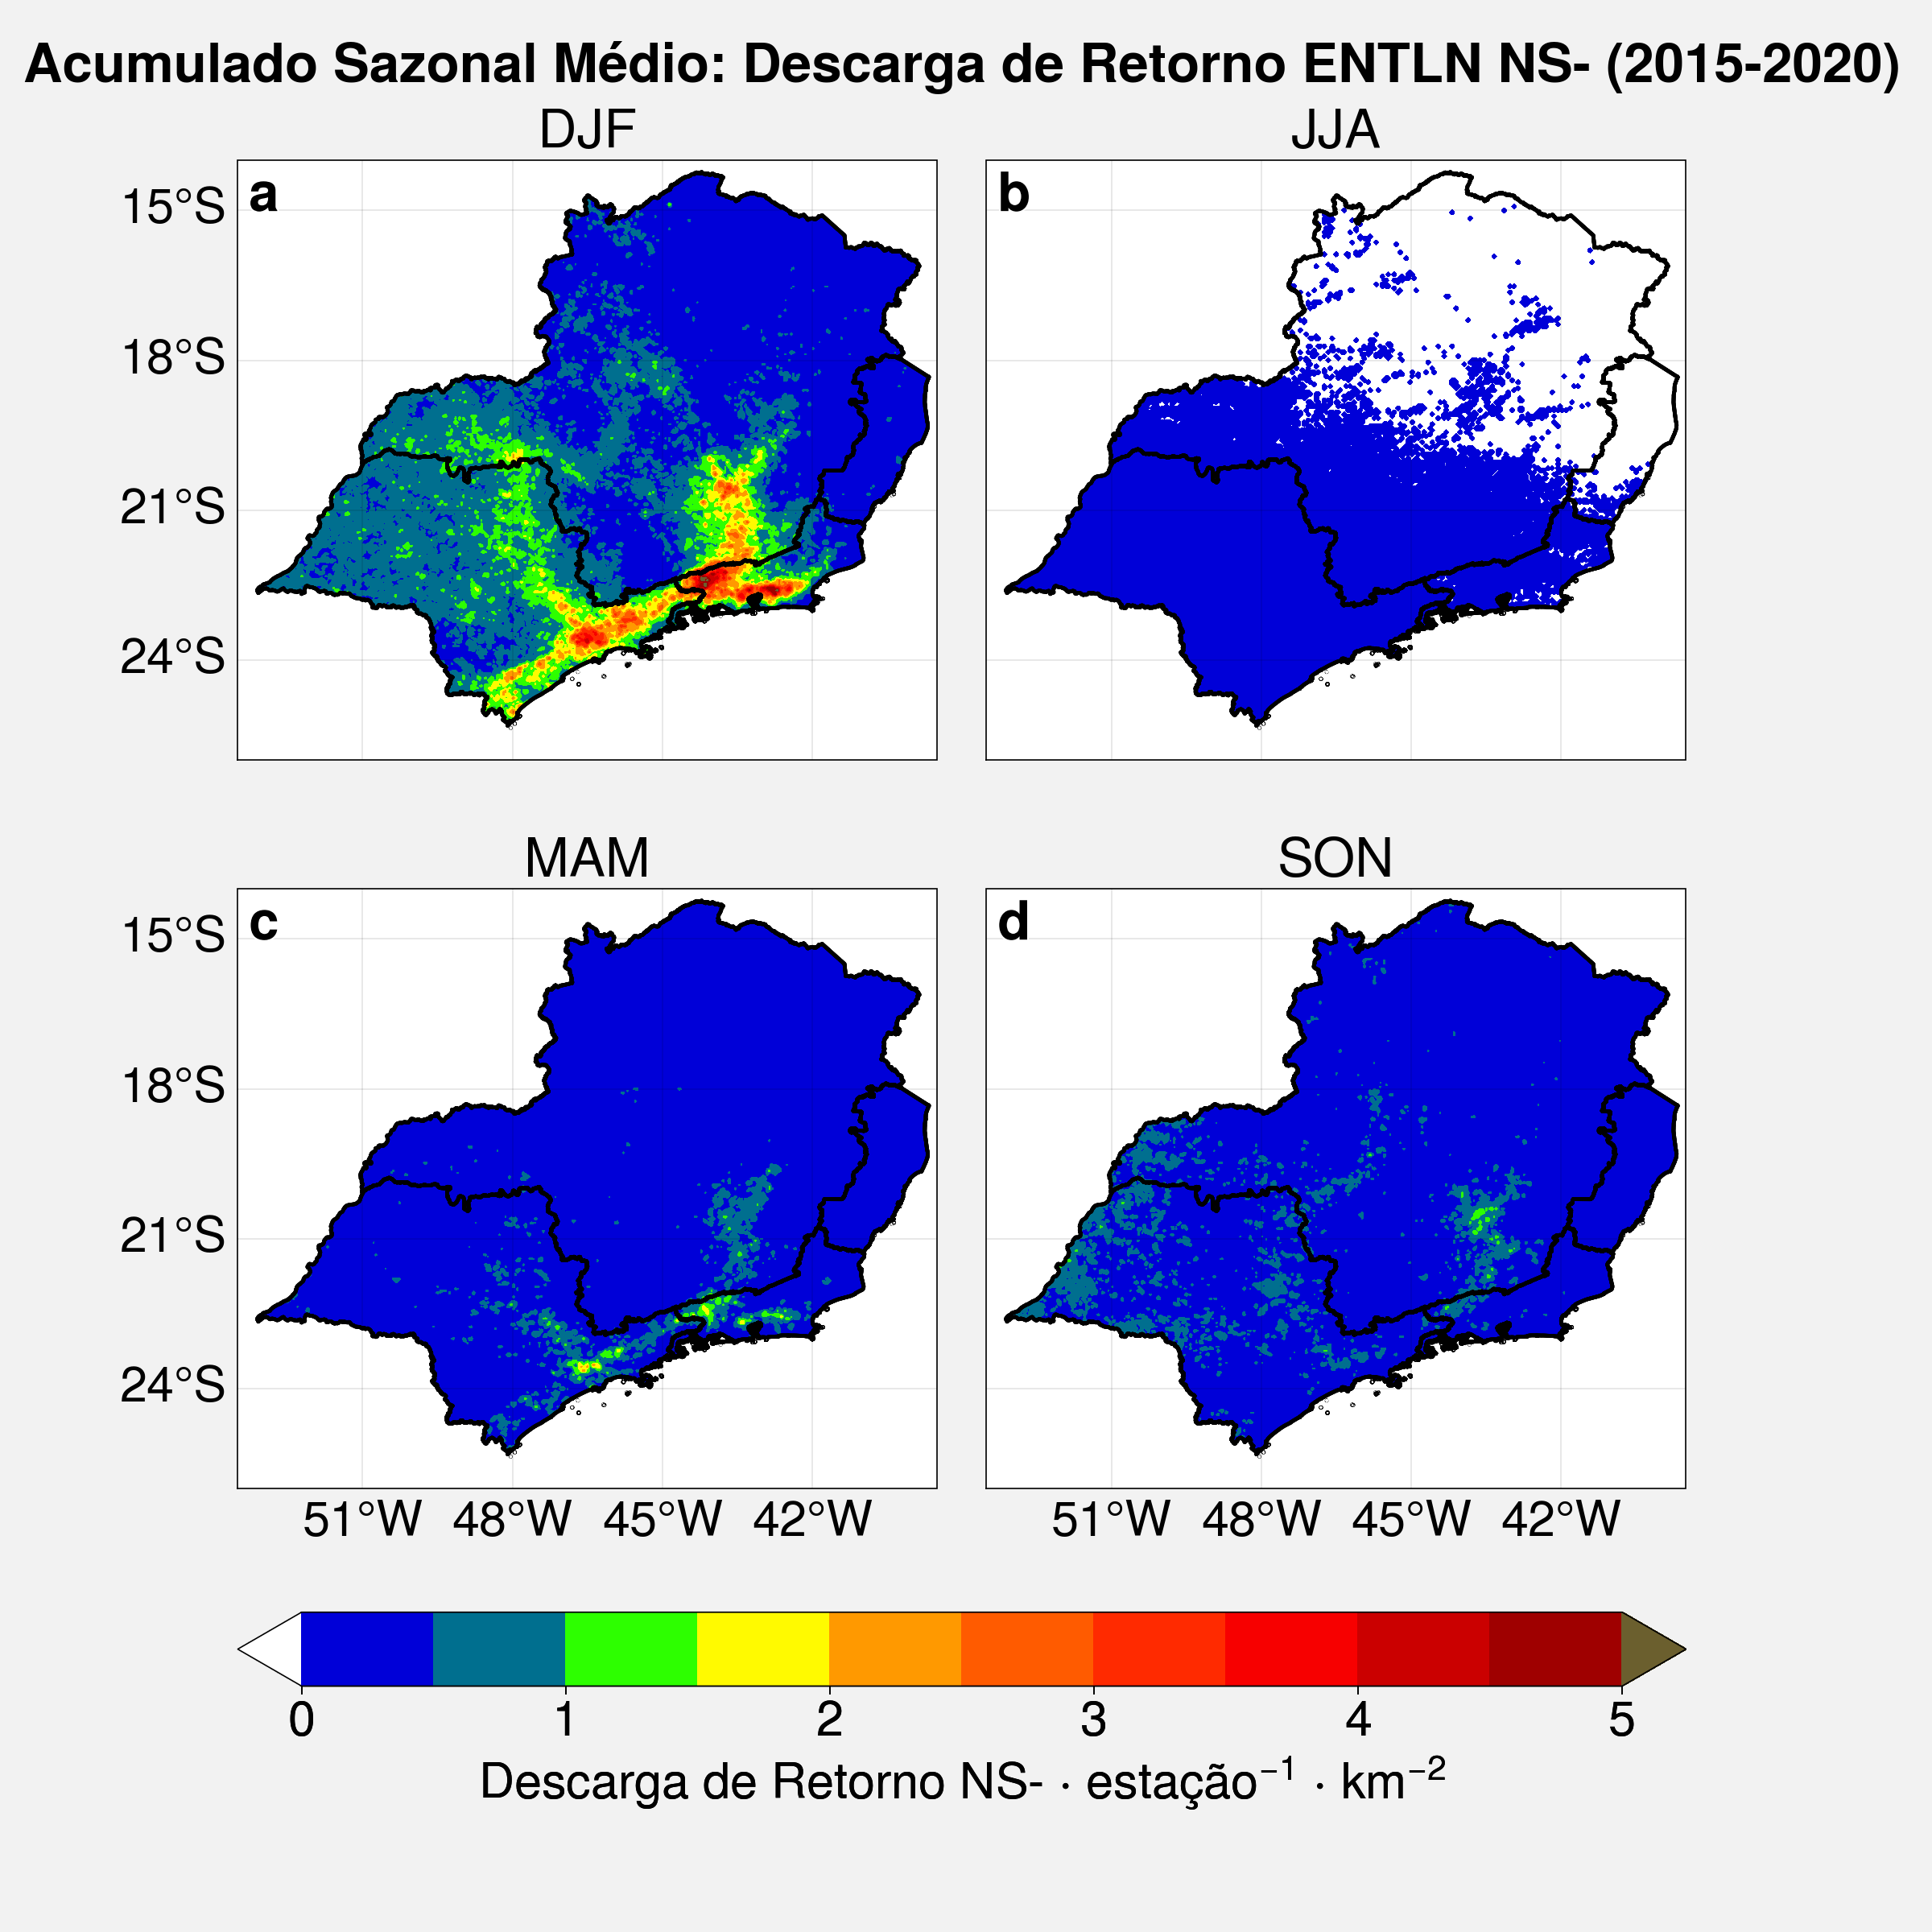

In [50]:
# Plotando a figura

matplotlib.rcParams.update({'font.size':22})  # seta o tamanho da fonte

# chama a figura
fig, ax = plot.subplots(figsize=(12,12), nrows=2, ncols=2, bottom='5em', right='5em',
                        sharex = False, sharey = False, proj='pcarree')
  
# configuração do plot
ax.format(coast=False, borders=True, innerborders=False, latlines=3, lonlines=3,
          latlim=(latN, latS), lonlim=(lonW, lonE), suptitle=f'Acumulado Sazonal Médio: Descarga de Retorno ENTLN NS- (2015-2020)')

## looping nas estações do nao
for s in range(len(raios_cg_neg_season)):

    # plota  a variável em cada estação do ano
    map1 = ax[s].contourf(raios_cg_neg_season.lon, raios_cg_neg_season.lat, raios_cg_neg_season[s,:,:],
                          cmap=cpt_convert_raios, vmax= 5, vmin= 0,  extend='both')
    
    # título da figura
    ax[s].format(title=raios_cg_neg_season.season[s].values,abc = 1, abcloc='ul')

    # molda as lebels de lat e lon
    if(s == 0):ax[s].format(labels = [True, False, False, False])
    if(s == 1):ax[s].format(labels = [False, False, False, False])
    if(s == 2):ax[s].format(labels = [True, False, True, False])
    if(s == 3):ax[s].format(labels = [False, False, True, False])

    # plota contornos dos Estados
    evm_plot_by_state()

# plota a barra de cores
fig.colorbar(map1, loc='b',label='Descarga de Retorno NS- ${\cdot}$ $estação^{-1}$ ${\cdot}$ $km^{-2}$')

# mostra a figura na tela
plot.show()

# salva a figura
fig.savefig(f'{output}ns_neg_strokes_media_sazonal_2015-2020.png', dpi=300)


## **ACUMULADO MENSAL MÉDIO DE RELÂMPAGOS**